## Data Import

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/train.csv')
print(len(df))
display(df.head())

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state=42)

X_train['ClientPeriod'] = pd.to_numeric(X_train['ClientPeriod'], errors='coerce')
X_train['TotalSpent'] = pd.to_numeric(X_train['TotalSpent'], errors='coerce')
X_test['ClientPeriod'] = pd.to_numeric(X_test['ClientPeriod'], errors='coerce')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_train = X_train.dropna()
X_test = X_test.dropna()

train = X_train.join(y_train)
test = X_test.join(y_test)

5282


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## EDA

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = []
bin_cols = []
num_cols = []
for col in train.columns.tolist():
    if len(train[col].value_counts()) > 2 and len(train[col].value_counts())<10:
        cat_cols.append(col)
    elif len(train[col].value_counts()) == 2:
        bin_cols.append(col)
    else:
        num_cols.append(col)


encoder = LabelEncoder()
# set binary cols to 0 and 1
for col in train.columns.tolist():
    if len(train[col].value_counts())== 2:
        train[col] = encoder.fit_transform(train[col])

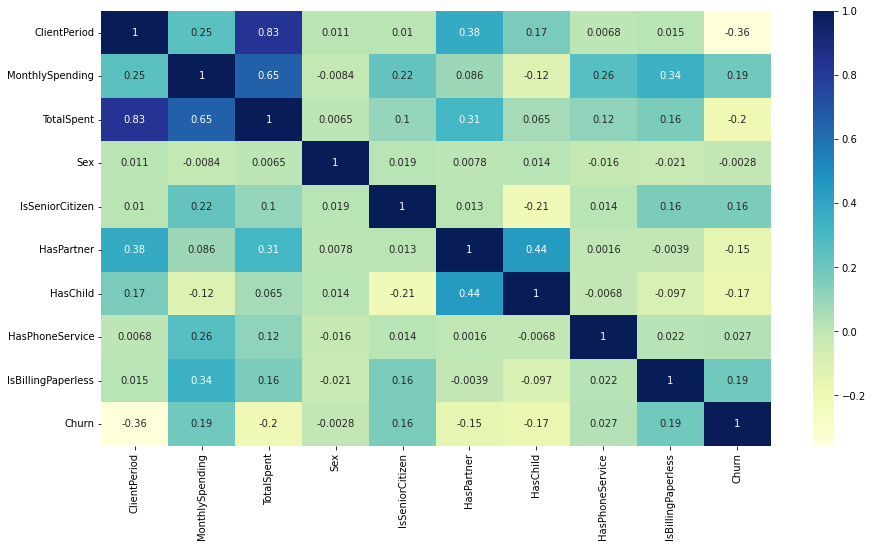

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
corr = train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
           cmap='YlGnBu')
None

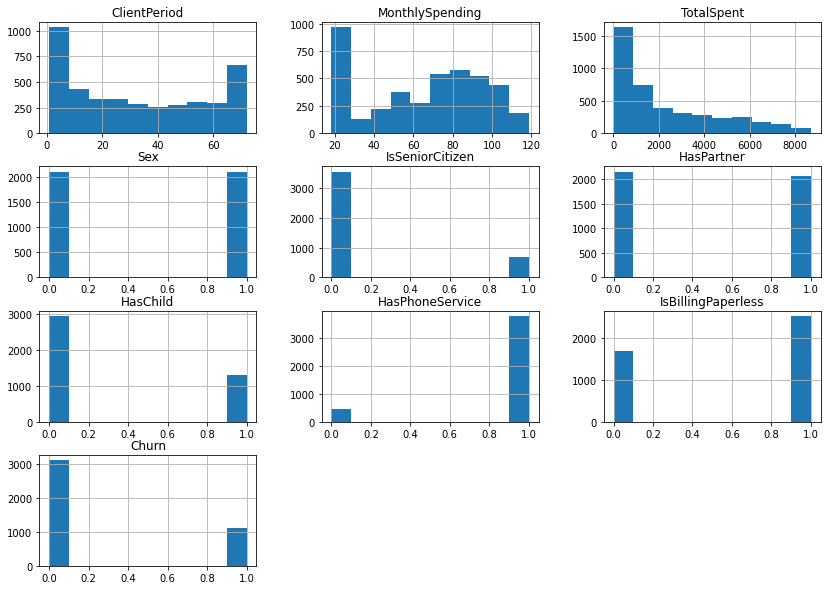

In [5]:
train.hist(figsize=(14,10))
None

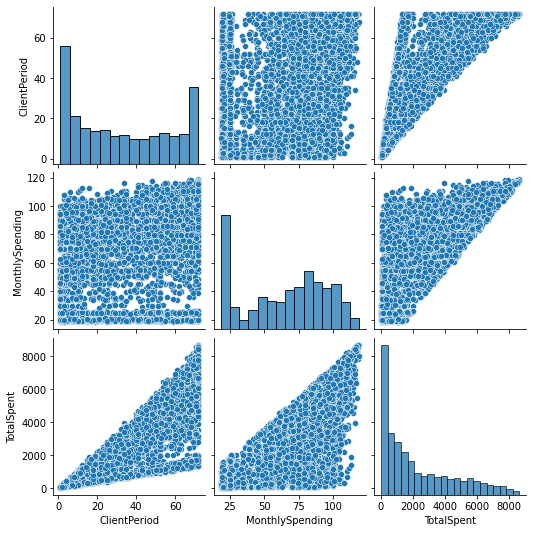

In [6]:
sns.pairplot(train[num_cols])

## Preprocessing

In [7]:
# one-hot encode categorical cols
encoder = OneHotEncoder()
print(cat_cols)
onehot = pd.DataFrame(encoder.fit_transform(train[cat_cols]).toarray(), columns=encoder.get_feature_names_out(cat_cols))
train = train.drop(columns=cat_cols)
train = train.reset_index()
train = train.join(onehot)



#same for test dataset
encoder = LabelEncoder()
for col in test.columns.tolist():
    if len(test[col].value_counts())== 2:
        test[col] = encoder.fit_transform(test[col])
encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(test[cat_cols]).toarray(), columns=encoder.get_feature_names_out(cat_cols))
test = test.drop(columns=cat_cols)
test = test.reset_index()
test = test.join(onehot)

['HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'PaymentMethod']


## Normalize Data

In [8]:
y_train = train['Churn']
X_train = train.drop(columns='Churn')
y_test = test['Churn']
X_test = test.drop(columns='Churn')

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, make_scorer, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       778
           1       0.45      0.82      0.58       278

    accuracy                           0.68      1056
   macro avg       0.68      0.73      0.66      1056
weighted avg       0.79      0.68      0.70      1056



## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict

/Users/baga_nuhkadiev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 0, 0])

In [12]:
(y_predict == y_test).sum() / len(y_test)
print(f'Validation ROC-AUC: {roc_auc_score(y_test, y_predict)}')

Validation ROC-AUC: 0.6831665772780234


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors': [i for i in range(5, 55, 10)]}
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
(y_predict == y_test).sum() / len(y_test)

0.7367424242424242

In [18]:
clf.best_params_

{'n_neighbors': 45}

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [i for i in range(2, 15)]}
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
(y_predict == y_test).sum() / len(y_test)

0.7765151515151515

In [26]:
clf.best_params_

{'max_depth': 3}

draw tree rules

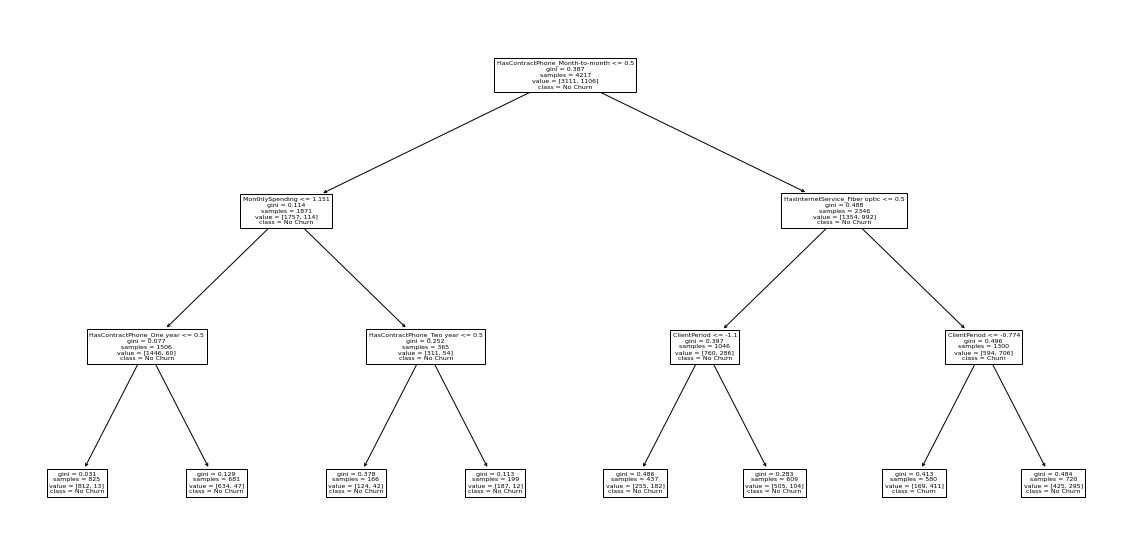

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
tree.plot_tree(dt,
               feature_names=X_train.columns, 
               class_names=['No Churn', 'Churn'])
plt.show()

## Gradient boosting

In [366]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(iterations=3000, task_type="CPU")
catboost_clf.fit(X_train, y_train)
y_predict = catboost_clf.predict(X_test)

Learning rate set to 0.006955
0:	learn: 0.6881292	total: 7.38ms	remaining: 22.1s
1:	learn: 0.6832010	total: 14ms	remaining: 21s
2:	learn: 0.6785256	total: 19.1ms	remaining: 19.1s
3:	learn: 0.6737065	total: 21.8ms	remaining: 16.3s
4:	learn: 0.6692283	total: 24.3ms	remaining: 14.6s
5:	learn: 0.6645765	total: 26.8ms	remaining: 13.4s
6:	learn: 0.6598378	total: 29.9ms	remaining: 12.8s
7:	learn: 0.6553481	total: 32.8ms	remaining: 12.3s
8:	learn: 0.6513112	total: 35.9ms	remaining: 11.9s
9:	learn: 0.6465828	total: 38.7ms	remaining: 11.6s
10:	learn: 0.6422698	total: 42.2ms	remaining: 11.5s
11:	learn: 0.6379498	total: 45.3ms	remaining: 11.3s
12:	learn: 0.6336197	total: 48ms	remaining: 11s
13:	learn: 0.6295041	total: 50.5ms	remaining: 10.8s
14:	learn: 0.6255079	total: 53.3ms	remaining: 10.6s
15:	learn: 0.6216623	total: 55.8ms	remaining: 10.4s
16:	learn: 0.6176980	total: 58.2ms	remaining: 10.2s
17:	learn: 0.6146286	total: 60.7ms	remaining: 10.1s
18:	learn: 0.6110424	total: 63.2ms	remaining: 9.91s


In [367]:
(y_predict == y_test).sum() / len(y_test)

0.7840909090909091

In [368]:

print(f'Validation ROC-AUC: {roc_auc_score(y_test, catboost_clf.predict_proba(X_test)[:, 1])}')

Validation ROC-AUC: 0.8198387305579702


## Random Forest

In [370]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [371]:
(y_predict == y_test).sum() / len(y_test)

0.7850378787878788